This programm is to run Exploratory Data Analysis and Data Visualization on IPL Data Set from Kaggle.

In [49]:
#To import packages needed #
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [58]:
# read the input files and look at the top few lines #
data_path = "/Users/venkatasravankanukolanu/Documents/Data Files/ipl/"
match_df = pd.read_csv(data_path+"matches.csv")
score_df = pd.read_csv(data_path+"deliveries.csv")
list(match_df)

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [59]:
list(score_df)

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [60]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [51]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

('Number of matches played so far : ', 636)
('Number of seasons : ', 10)


I will divide the exploratory data analysis on this data into 2 stages: 
1. Analysis on match level data
2. Analysis on delivery level data

# Exploratory Data Analysis on Match level data

In [68]:
no_matches_by_year=match_df.groupby(['season']).size()
print("Number of matches by each year:",no_matches_by_year)

('Number of matches by each year:', season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64)


Count plot of matches by each year/season

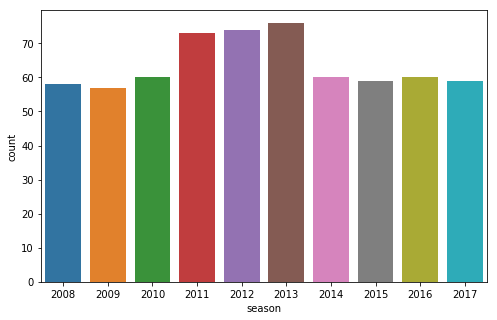

In [150]:
plt.subplots(figsize=(8,5))
sns.countplot(x='season', data=match_df)
plt.show()

In [70]:
no_matches_at_location=match_df.groupby(['city']).size()
print("Number of matches at each location:",no_matches_at_location)

('Number of matches at each location:', city
Abu Dhabi          7
Ahmedabad         12
Bangalore         66
Bloemfontein       2
Cape Town          7
Centurion         12
Chandigarh        46
Chennai           48
Cuttack            7
Delhi             60
Dharamsala         9
Durban            15
East London        3
Hyderabad         49
Indore             5
Jaipur            33
Johannesburg       8
Kanpur             4
Kimberley          3
Kochi              5
Kolkata           61
Mumbai            85
Nagpur             3
Port Elizabeth     7
Pune              32
Raipur             6
Rajkot            10
Ranchi             7
Sharjah            6
Visakhapatnam     11
dtype: int64)


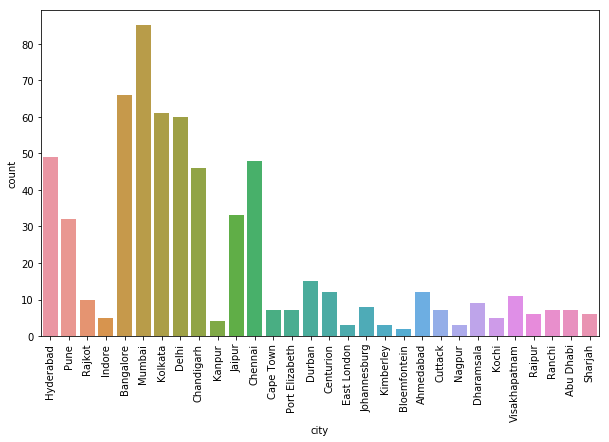

In [149]:
plt.subplots(figsize=(10,6))
sns.countplot(x='city', data=match_df)
plt.xticks(rotation='vertical')
plt.show()

Let us explore if there is any correlation b/w the no: of matches played and the no: of matches won

In [77]:
no_matches_each_team=match_df.groupby(['team1']).size()+match_df.groupby(['team2']).size()
print("Number of matches each team played:",no_matches_each_team)

('Number of matches each team played:', team1
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   46
Rajasthan Royals               118
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
dtype: int64)


In [78]:
no_matches_won=match_df.groupby(['winner']).size()
print("Number of matches each team won:",no_matches_won)

('Number of matches each team won:', winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
dtype: int64)


In [101]:
print("The correlation between matches won and matches played is",np.corrcoef(no_matches_won,no_matches_each_team)[0,1])

('The correlation between matches won and matches played is', 0.97213773472453657)


The Pearson Correlation Coefficient is 0.97, which means the correlation is positively high. This says the number of wins of a team increase as they play more matches.

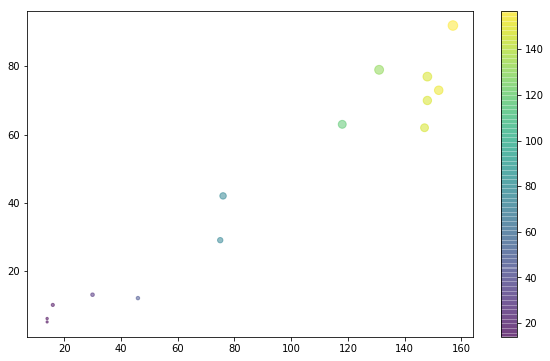

In [152]:
plt.subplots(figsize=(10,6))
colors = no_matches_each_team
sizes = no_matches_won
plt.scatter(no_matches_each_team, no_matches_won, c=colors, s=sizes, alpha=0.5,
            cmap='viridis')
plt.colorbar()  # show color scale

Lighter color circles are bigger in size while darker circles are smaller in size. This supports the high positive value of correlation coefficient computed earlier.

Let us see the if there is any relation b/w a team winning the toss and the team winning the match.

In [140]:
match_df['wintoss_match']=np.where(match_df['toss_winner']==match_df['winner'],1,0)
pd.value_counts(match_df['wintoss_match'].values, sort=False)

0    311
1    325
dtype: int64

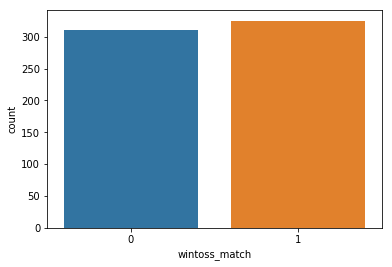

In [141]:
sns.countplot(x='wintoss_match', data=match_df)
plt.xticks(rotation='horizontal')
plt.show()

Since the number of wins are almost same for teams that won or lost the toss, we can say that toss has no effect on the result of the game.

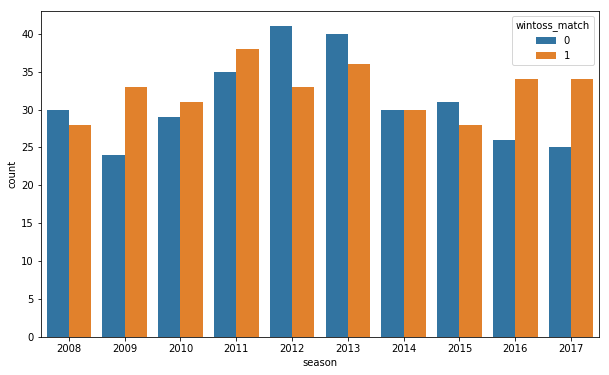

In [148]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='wintoss_match',data=match_df)
plt.show()

Since the last 2 seasons the teams winning the toss are turning out to be the match winners.

#### Toss Decisions

Let us start with the overall toss decision

In [142]:
pd.value_counts(match_df['toss_decision'].values, sort=False)

bat      273
field    363
dtype: int64

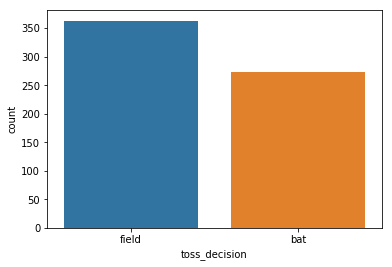

In [143]:
sns.countplot(x='toss_decision', data=match_df)
plt.xticks(rotation='horizontal')
plt.show()

More number of teams elected to field first after winning the toss. Given the shorter format of IPL matches and high scoring games, it makes sense to say that teams prefer chasing the targets thsn setting targets. Will see the toss decisions by each season.

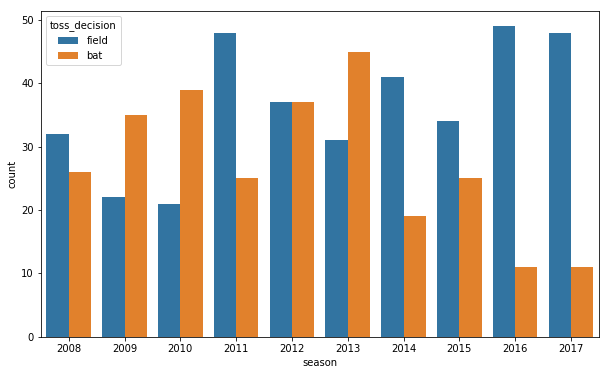

In [153]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=match_df)
plt.show()

It looks like electing to field is an emerging pattern among teams across seasons.

Since the last 2 seasons, majority of the teams winning the toss elected to field first and majority of the the teams winning the toss also won the match. Now, let us see if there is a relation between fielding first and winning the match.

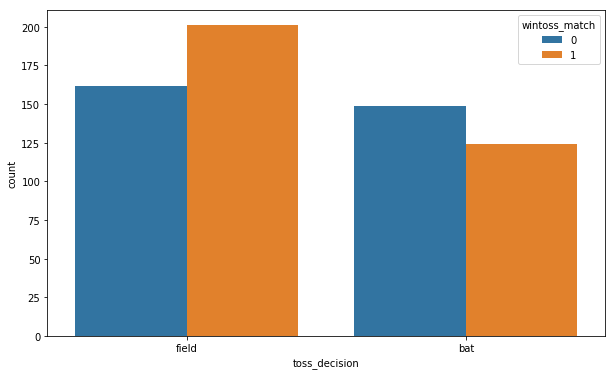

In [155]:
plt.subplots(figsize=(10,6))
sns.countplot(x='toss_decision',hue='wintoss_match',data=match_df)
plt.show()

Among teams who won the toss, teams who elected to field first won more matches than teams who elected to bat first.

### Analysis between winners, win by runs and win by wickets

In [179]:
win_avg_runs=match_df.groupby(['winner'])['win_by_runs'].mean()
win_avg_runs.sort_values(ascending=False)


winner
Chennai Super Kings            20.088608
Mumbai Indians                 16.652174
Royal Challengers Bangalore    16.383562
Deccan Chargers                14.517241
Rajasthan Royals               13.031746
Kings XI Punjab                12.314286
Rising Pune Supergiant         12.300000
Kolkata Knight Riders          11.649351
Pune Warriors                  11.583333
Sunrisers Hyderabad            11.333333
Rising Pune Supergiants        10.600000
Delhi Daredevils                9.209677
Kochi Tuskers Kerala            3.833333
Gujarat Lions                   0.076923
Name: win_by_runs, dtype: float64

CSK won by highest margin run when they bated first followed by MI, RCB and DC respectively.

In [180]:
win_avg_wickets=match_df.groupby(['winner'])['win_by_wickets'].mean()
win_avg_wickets.sort_values(ascending=False)

winner
Kochi Tuskers Kerala           5.000000
Gujarat Lions                  5.000000
Delhi Daredevils               4.322581
Rising Pune Supergiants        4.000000
Royal Challengers Bangalore    3.794521
Kolkata Knight Riders          3.779221
Rajasthan Royals               3.698413
Kings XI Punjab                3.242857
Rising Pune Supergiant         3.100000
Pune Warriors                  3.000000
Mumbai Indians                 2.934783
Sunrisers Hyderabad            2.785714
Chennai Super Kings            2.632911
Deccan Chargers                2.482759
Name: win_by_wickets, dtype: float64

KTK won by highest margin of wickets when they fielded first followed by GL, DD and RPS respectively.

## Multivariate Analysis with 3 or more features